In [ ]:
"""
@date: 3.8.2025
@author: hjooh

Intended to model the "data pipeline" for the Magic Leap 2 trials.
NOTE: UNFINISHED - this is NOT the final version of the pipeline, located in private directory.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     # might not be necessary permanently
from sklearn.preprocessing import PowerTransformer

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
csv_paths = ''
print(f"Current WD: {os.getcwd()}")
if os.path.exists(csv_paths):

    try:
        print("Listing contents:")
        print(os.listdir(csv_paths))
    except PermissionError:
        print("Permission denied :(")

Current working directory: c:\Users\clair\ar-privacy\BurgsDevelopment\cshinh
Does the directory exist? True
Is it a directory? True
Listing directory contents:
['all_data.csv', 'blinds_meetingroom_1.csv', 'blinds_meetingroom_2.csv', 'blinds_meetingroom_3_offset2seconds.csv', 'blinds_meetingroom_4.csv', 'hallway_1.csv', 'hallway_2.csv', 'hallway_3.csv', 'hallway_4.csv', 'windows_meetingroom_1.csv', 'windows_meetingroom_2.csv', 'windows_meetingroom_3.csv', 'windows_meetingroom_4.csv']


In [ ]:
csv_paths = ''

blinds_1 = pd.read_csv(os.path.join(csv_paths, 'blinds_meetingroom_1.csv'))
blinds_2 = pd.read_csv(os.path.join(csv_paths, 'blinds_meetingroom_2.csv'))
blinds_3 = pd.read_csv(os.path.join(csv_paths, 'blinds_meetingroom_3_offset2seconds.csv'))
blinds_4 = pd.read_csv(os.path.join(csv_paths, 'blinds_meetingroom_4.csv'))

hallway_1 = pd.read_csv(os.path.join(csv_paths, 'hallway_1.csv'))
hallway_2 = pd.read_csv(os.path.join(csv_paths, 'hallway_2.csv'))
hallway_3 = pd.read_csv(os.path.join(csv_paths, 'hallway_3.csv'))
hallway_4 = pd.read_csv(os.path.join(csv_paths, 'hallway_4.csv'))

windows_1 = pd.read_csv(os.path.join(csv_paths, 'windows_meetingroom_1.csv'))
windows_2 = pd.read_csv(os.path.join(csv_paths, 'windows_meetingroom_2.csv'))
windows_3 = pd.read_csv(os.path.join(csv_paths, 'windows_meetingroom_3.csv'))
windows_4 = pd.read_csv(os.path.join(csv_paths, 'windows_meetingroom_4.csv'))

In [20]:
# Add a run number column to each csv
blinds_1['run_number'] = 1
blinds_2['run_number'] = 2
blinds_3['run_number'] = 3
blinds_4['run_number'] = 4  

hallway_1['run_number'] = 1
hallway_2['run_number'] = 2
hallway_3['run_number'] = 3
hallway_4['run_number'] = 4

windows_1['run_number'] = 1
windows_2['run_number'] = 2
windows_3['run_number'] = 3
windows_4['run_number'] = 4

In [21]:
# Drop first row of csv
blinds_1 = blinds_1.iloc[1:]
blinds_2 = blinds_2.iloc[1:]
blinds_3 = blinds_3.iloc[1:]
blinds_4 = blinds_4.iloc[1:]

hallway_1 = hallway_1.iloc[1:]
hallway_2 = hallway_2.iloc[1:]
hallway_3 = hallway_3.iloc[1:]
hallway_4 = hallway_4.iloc[1:]

windows_1 = windows_1.iloc[1:]
windows_2 = windows_2.iloc[1:]
windows_3 = windows_3.iloc[1:]
windows_4 = windows_4.iloc[1:]

In [22]:
# Convert all values to floats
blinds_1 = blinds_1.astype(float)
blinds_2 = blinds_2.astype(float)
blinds_3 = blinds_3.astype(float)
blinds_4 = blinds_4.astype(float)

hallway_1 = hallway_1.astype(float)
hallway_2 = hallway_2.astype(float)
hallway_3 = hallway_3.astype(float)
hallway_4 = hallway_4.astype(float)

windows_1 = windows_1.astype(float)
windows_2 = windows_2.astype(float)
windows_3 = windows_3.astype(float)
windows_4 = windows_4.astype(float)


In [23]:
# blinds_3 is offset by 2 seconds, start at 11 and update time to be shifted 
blinds_3 = blinds_3.iloc[10:]
blinds_3

,time,events,wearable,soc,cvip,cpu,gpu,5v_sys,nvme_pwr1,nvme_pwr3,...,Tboard_soc1tmp,Tdiode_soc1tmp,battery,chrgr,ddr1,ddr2,mem,mero2,vrm,run_number
11,2.004,NaN,5389000.0,914000.0,1758000.0,635000.0,105000.0,6132000.0,20000.0,14000.0,...,109.4,107.15,88.52,104.5616,109.2866,107.6000,102.5366,109.7366,107.0366,3.0
12,2.204,NaN,5414000.0,839000.0,2233000.0,1754000.0,3439000.0,6101000.0,20000.0,14000.0,...,109.4,107.15,88.52,104.6750,109.6250,107.9366,102.6500,109.9616,107.2616,3.0
13,2.404,NaN,5414000.0,949000.0,2731000.0,1270000.0,3331000.0,6101000.0,30000.0,14000.0,...,111.2,107.15,88.52,104.6750,109.6250,107.9366,102.6500,109.9616,107.2616,3.0
14,2.604,NaN,5441000.0,751000.0,2029000.0,1351000.0,3337000.0,6101000.0,30000.0,11000.0,...,111.2,107.15,88.52,104.6750,109.6250,107.9366,102.6500,109.9616,107.2616,3.0
15,2.804,NaN,5441000.0,860000.0,2755000.0,1250000.0,3372000.0,6074000.0,20000.0,11000.0,...,111.2,107.15,88.52,104.6750,109.6250,107.9366,102.6500,109.9616,107.2616,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,67.205,NaN,5493000.0,1048000.0,1639000.0,1209000.0,2763000.0,6346000.0,20000.0,32000.0,...,120.2,119.30,89.06,113.2250,119.9750,118.2866,109.6250,120.6500,117.3866,3.0
338,67.404,NaN,5493000.0,874000.0,1568000.0,987000.0,3071000.0,6378000.0,20000.0,32000.0,...,120.2,119.30,89.06,113.3366,120.0866,118.5116,109.7366,120.8750,117.5000,3.0
339,67.603,NaN,5533000.0,1016000.0,2114000.0,1178000.0,105000.0,6378000.0,20000.0,32000.0,...,120.2,119.30,89.06,113.3366,120.0866,118.5116,109.7366,120.8750,117.5000,3.0
340,67.804,NaN,5533000.0,1036000.0,2423000.0,1593000.0,105000.0,6315000.0,20000.0,11000.0,...,120.2,119.30,89.06,113.3366,120.0866,118.5116,109.7366,120.8750,117.5000,3.0


In [24]:
blinds_3['time'] = blinds_3['time'] - 2.0

In [25]:
blinds_3

,time,events,wearable,soc,cvip,cpu,gpu,5v_sys,nvme_pwr1,nvme_pwr3,...,Tboard_soc1tmp,Tdiode_soc1tmp,battery,chrgr,ddr1,ddr2,mem,mero2,vrm,run_number
11,0.004,NaN,5389000.0,914000.0,1758000.0,635000.0,105000.0,6132000.0,20000.0,14000.0,...,109.4,107.15,88.52,104.5616,109.2866,107.6000,102.5366,109.7366,107.0366,3.0
12,0.204,NaN,5414000.0,839000.0,2233000.0,1754000.0,3439000.0,6101000.0,20000.0,14000.0,...,109.4,107.15,88.52,104.6750,109.6250,107.9366,102.6500,109.9616,107.2616,3.0
13,0.404,NaN,5414000.0,949000.0,2731000.0,1270000.0,3331000.0,6101000.0,30000.0,14000.0,...,111.2,107.15,88.52,104.6750,109.6250,107.9366,102.6500,109.9616,107.2616,3.0
14,0.604,NaN,5441000.0,751000.0,2029000.0,1351000.0,3337000.0,6101000.0,30000.0,11000.0,...,111.2,107.15,88.52,104.6750,109.6250,107.9366,102.6500,109.9616,107.2616,3.0
15,0.804,NaN,5441000.0,860000.0,2755000.0,1250000.0,3372000.0,6074000.0,20000.0,11000.0,...,111.2,107.15,88.52,104.6750,109.6250,107.9366,102.6500,109.9616,107.2616,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,65.205,NaN,5493000.0,1048000.0,1639000.0,1209000.0,2763000.0,6346000.0,20000.0,32000.0,...,120.2,119.30,89.06,113.2250,119.9750,118.2866,109.6250,120.6500,117.3866,3.0
338,65.404,NaN,5493000.0,874000.0,1568000.0,987000.0,3071000.0,6378000.0,20000.0,32000.0,...,120.2,119.30,89.06,113.3366,120.0866,118.5116,109.7366,120.8750,117.5000,3.0
339,65.603,NaN,5533000.0,1016000.0,2114000.0,1178000.0,105000.0,6378000.0,20000.0,32000.0,...,120.2,119.30,89.06,113.3366,120.0866,118.5116,109.7366,120.8750,117.5000,3.0
340,65.804,NaN,5533000.0,1036000.0,2423000.0,1593000.0,105000.0,6315000.0,20000.0,11000.0,...,120.2,119.30,89.06,113.3366,120.0866,118.5116,109.7366,120.8750,117.5000,3.0


In [26]:
print(len(blinds_1), len(blinds_2), len(blinds_3), len(blinds_4))
print(len(hallway_1), len(hallway_2), len(hallway_3), len(hallway_4))
print(len(windows_1), len(windows_2), len(windows_3), len(windows_4))

310 308 331 360
302 302 302 302
303 323 336 323


In [ ]:
def round_to_200ms(df):
    df_copy = df.copy()
    
    # Save the first row's time value
    first_time = df_copy['time'].iloc[0]
    
    # Round time values to nearest 0.200 second multiple
    df_copy['time'] = (df_copy['time'] / 0.200).round() * 0.200
    
    # If first row was 0 or very close to 0, ensure it stays at 0
    if first_time < 0.1:
        df_copy.loc[df_copy.index[0], 'time'] = 0.000
    
    # Update the time_delta index to match the new time values
    df_copy['time_delta'] = pd.to_timedelta(df_copy['time'] * 1000, unit='ms')
    
    # Reset and set the new index
    df_copy = df_copy.reset_index(drop=True)
    df_copy = df_copy.set_index('time_delta')
    
    return df_copy

In [28]:
# Update 'time' column to be rounded to multiples of .200 seconds without losing the first row (0.000)
b1 = round_to_200ms(blinds_1)
b2 = round_to_200ms(blinds_2)
b3 = round_to_200ms(blinds_3)
b4 = round_to_200ms(blinds_4)

h1 = round_to_200ms(hallway_1)
h2 = round_to_200ms(hallway_2)
h3 = round_to_200ms(hallway_3)
h4 = round_to_200ms(hallway_4)

w1 = round_to_200ms(windows_1)
w2 = round_to_200ms(windows_2)
w3 = round_to_200ms(windows_3)
w4 = round_to_200ms(windows_4)


In [29]:
linear_cols = ['events', 'Tdiode_soc1tmp', 'battery', 'chrgr', 'ddr1', 'ddr2', 'mem', 'mero2', 'vrm', 'run_number', 'nvme_pwr2', 'nvme_pwr1', 'Tboard_soc1tmp', 'gpu', 'THERM_TOT_PWR-throttle', 'THERM_TOT_PWR', 'PROC_TOT_PWR', 'LPDDR_PWR', 'vddp_s5', 'time', 'vddp_run', 'wlan', 'nvme_pwr3']
b_1 = b1.drop(columns=linear_cols)
b_2 = b2.drop(columns=linear_cols)
b_3 = b3.drop(columns=linear_cols)
b_4 = b4.drop(columns=linear_cols)

h_1 = h1.drop(columns=linear_cols)
h_2 = h2.drop(columns=linear_cols)
h_3 = h3.drop(columns=linear_cols)
h_4 = h4.drop(columns=linear_cols)

w_1 = w1.drop(columns=linear_cols)
w_2 = w2.drop(columns=linear_cols)
w_3 = w3.drop(columns=linear_cols)
w_4 = w4.drop(columns=linear_cols)

In [ ]:
from matplotlib import colormaps
import numpy as np

def plot_room_type(dataframes, column, room_type, labels=None):
    """
    Plot a column from multiple dataframes on a single graph.
    
    Parameters:
    dataframes (list): List of dataframes to plot
    column (str): Column name to plot
    room_type (str): Type of room for title
    labels (list, optional): List of labels for each dataframe
    """
    if not isinstance(dataframes, list):
        dataframes = [dataframes]
        print("Warning: Single dataframe converted to list")
    
    plt.figure(figsize=(10, 6))
    
    if labels is None:
        labels = [f'{room_type.lower()}_{i+1}' for i in range(len(dataframes))]
    
    cmap = plt.cm.get_cmap('plasma')
    colors = cmap(np.linspace(0.2, 0.7, len(dataframes)))
    
    for i, df in enumerate(dataframes):
        print(f"Plotting {i+1}")
        df[column].plot(label=labels[i], color=colors[i])
    
    plt.xlabel('Time (seconds)')
    plt.ylabel(column)
    plt.title(f"'{column}' Measurements for {room_type} Datasets")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Plotting 4 dataframes
Plotting dataframe 1
Plotting dataframe 2
Plotting dataframe 3
Plotting dataframe 4


C:\Users\clair\AppData\Local\Temp\ipykernel_33528\558510811.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('plasma')


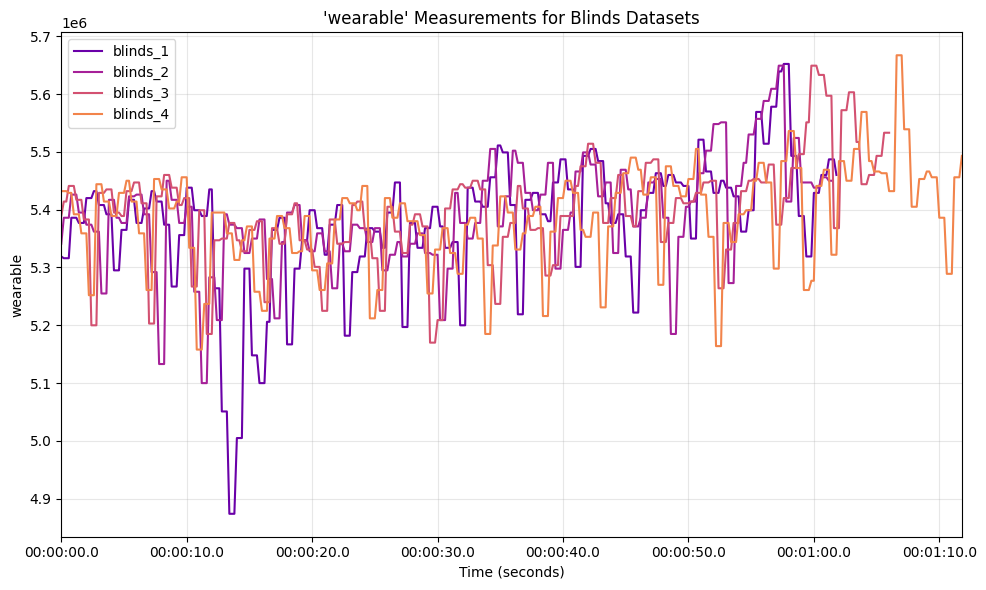

Plotting 4 dataframes
Plotting dataframe 1
Plotting dataframe 2
Plotting dataframe 3
Plotting dataframe 4


C:\Users\clair\AppData\Local\Temp\ipykernel_33528\558510811.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('plasma')


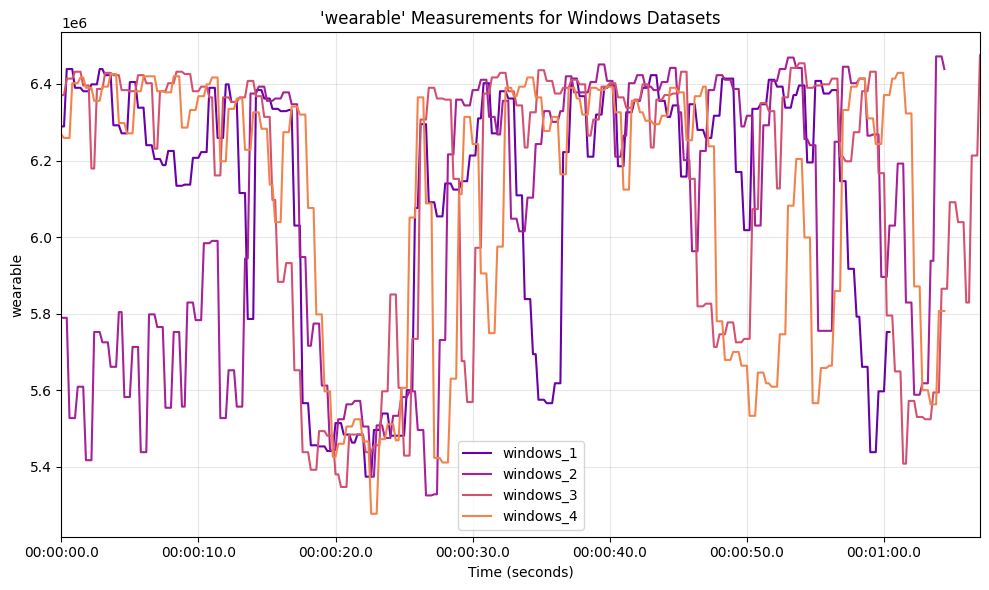

Plotting 4 dataframes
Plotting dataframe 1
Plotting dataframe 2
Plotting dataframe 3
Plotting dataframe 4


C:\Users\clair\AppData\Local\Temp\ipykernel_33528\558510811.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('plasma')


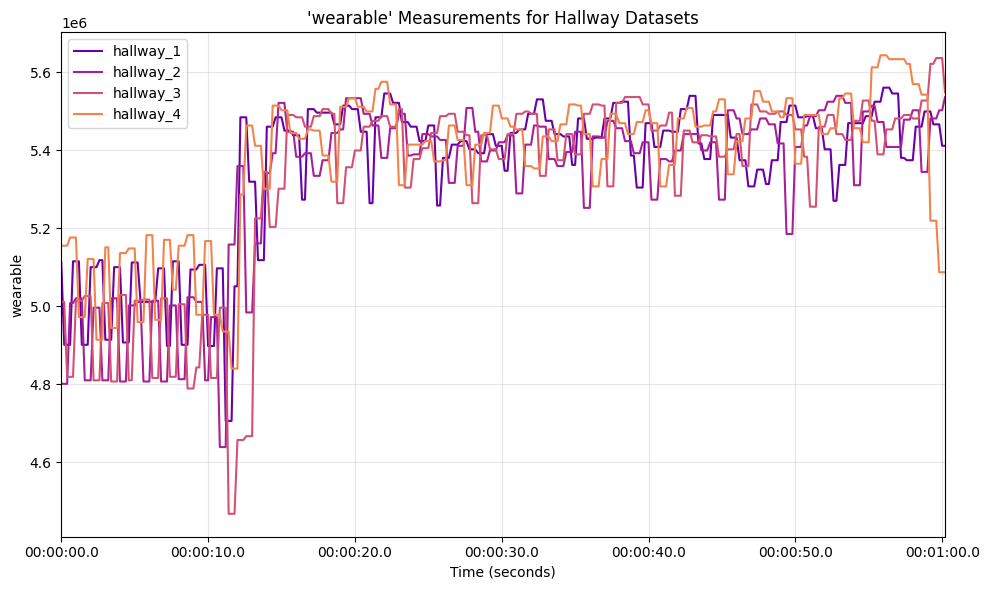

In [31]:
blinds = [b_1, b_2, b_3, b_4]
blinds_col = 'wearable'
p1 = plot_room_type(blinds, blinds_col, 'Blinds')

windows = [w_1, w_2, w_3, w_4]
windows_col = 'wearable'
p2 = plot_room_type(windows, windows_col, 'Windows')

hallway = [h_1, h_2, h_3, h_4]
hallway_col = 'wearable'
p3 = plot_room_type(hallway, hallway_col, 'Hallway')

In [34]:
# Join csvs
blinds_all = pd.concat([b_1, b_2, b_3, b_4])
#hallway_all = pd.concat([hallway_1_resampled, hallway_2_resampled, hallway_3_resampled, hallway_4_resampled])
#windows_all = pd.concat([windows_1_resampled, windows_2_resampled, windows_3_resampled, windows_4_resampled])

# Join all csvs
#all_data = pd.concat([blinds_all, hallway_all, windows_all], ignore_index=False)

# Save to csv
#all_data.to_csv(os.path.join(csv_paths, 'all_data.csv'), index=False)

Number of NaN values in blinds_all['wearable']: 0


<Figure size 1200x500 with 0 Axes>

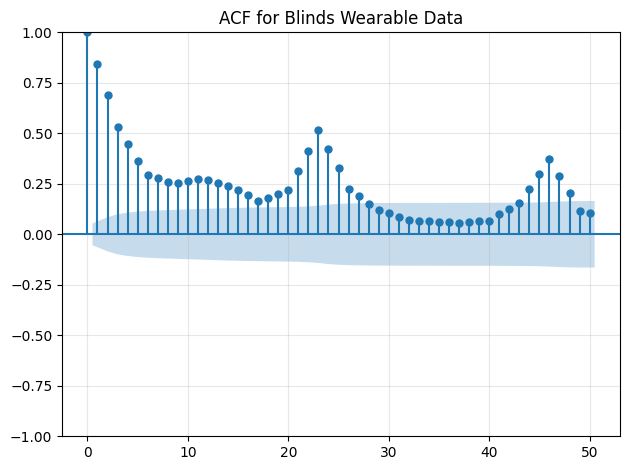

<Figure size 1200x500 with 0 Axes>

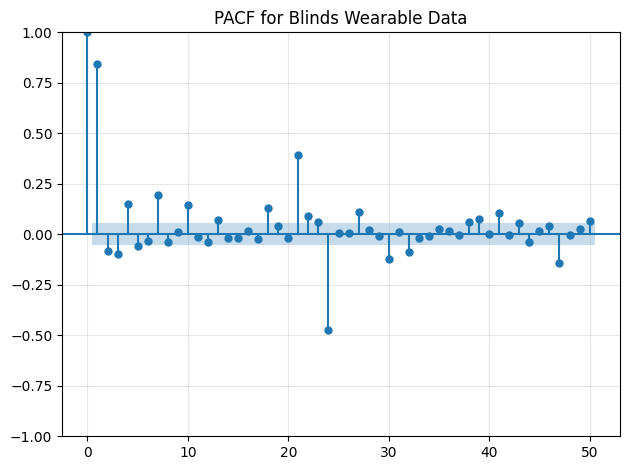

ACF values for first 20 lags:
Lag 0: 1.0000
Lag 1: 0.8435
Lag 2: 0.6875
Lag 3: 0.5306
Lag 4: 0.4457
Lag 5: 0.3633
Lag 6: 0.2916
Lag 7: 0.2764
Lag 8: 0.2603
Lag 9: 0.2539
Lag 10: 0.2638
Lag 11: 0.2742
Lag 12: 0.2689
Lag 13: 0.2543
Lag 14: 0.2386
Lag 15: 0.2210
Lag 16: 0.1940
Lag 17: 0.1657
Lag 18: 0.1800
Lag 19: 0.1999
Lag 20: 0.2180

PACF values for first 20 lags:
Lag 0: 1.0000
Lag 1: 0.8441
Lag 2: -0.0832
Lag 3: -0.0963
Lag 4: 0.1520
Lag 5: -0.0592
Lag 6: -0.0354
Lag 7: 0.1947
Lag 8: -0.0408
Lag 9: 0.0110
Lag 10: 0.1499
Lag 11: -0.0160
Lag 12: -0.0388
Lag 13: 0.0715
Lag 14: -0.0177
Lag 15: -0.0213
Lag 16: 0.0197
Lag 17: -0.0264
Lag 18: 0.1339
Lag 19: 0.0398
Lag 20: -0.0195


In [ ]:
# Calculate and plot ACF and PACF for blinds_all separately
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

print(f"Number of NaN values in blinds_all['wearable']: {blinds_all['wearable'].isna().sum()}")

blinds_all_clean = blinds_all.dropna(subset=['wearable'])

plt.figure(figsize=(12, 5))
plot_acf(blinds_all_clean['wearable'], lags=50)
plt.title('ACF for Blinds Wearable Data')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(blinds_all_clean['wearable'], lags=50)
plt.title('PACF for Blinds Wearable Data')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

from statsmodels.tsa.stattools import acf, pacf

acf_values = acf(blinds_all_clean['wearable'], nlags=20)
pacf_values = pacf(blinds_all_clean['wearable'], nlags=20)

print("ACF values for first 20 lags:")
for i, val in enumerate(acf_values):
    print(f"Lag {i}: {val:.4f}")

print("\nPACF values for first 20 lags:")
for i, val in enumerate(pacf_values):
    print(f"Lag {i}: {val:.4f}")


In [ ]:
all_data